# Question 6 

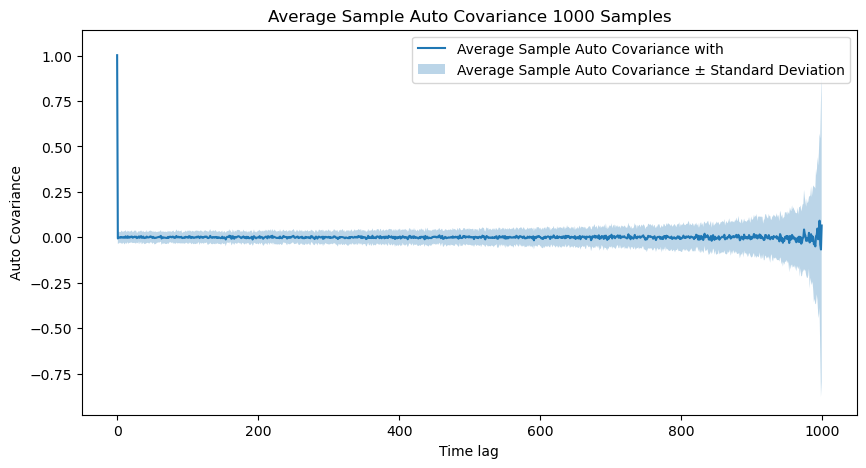

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
num_simulations = 100
sigma_sq = 1.0
fs = 1.0  # sampling frequency

autocovariances = np.zeros((num_simulations, N))

# 100 times iterations
for i in range(num_simulations):
    X = np.random.normal(0, np.sqrt(sigma_sq), N)  # generate gaussian white noise
    for tau in range(N):
        autocovariances[i, tau] = np.mean(X[:N - tau] * X[tau:])



# calculate average and standard deviation
avg_autocov = np.mean(autocovariances, axis=0)
std_autocov = np.std(autocovariances, axis=0)

# plot
plt.figure(figsize=(10, 5))
plt.plot(avg_autocov, label='Average Sample Auto Covariance with ')
plt.fill_between(range(N), avg_autocov - std_autocov, avg_autocov + std_autocov, alpha=0.3, label='Average Sample Auto Covariance ± Standard Deviation')
plt.xlabel('Time lag')
plt.ylabel('Auto Covariance')
plt.legend()
plt.title('Average Sample Auto Covariance '+ str(N) + " Samples")
plt.show()


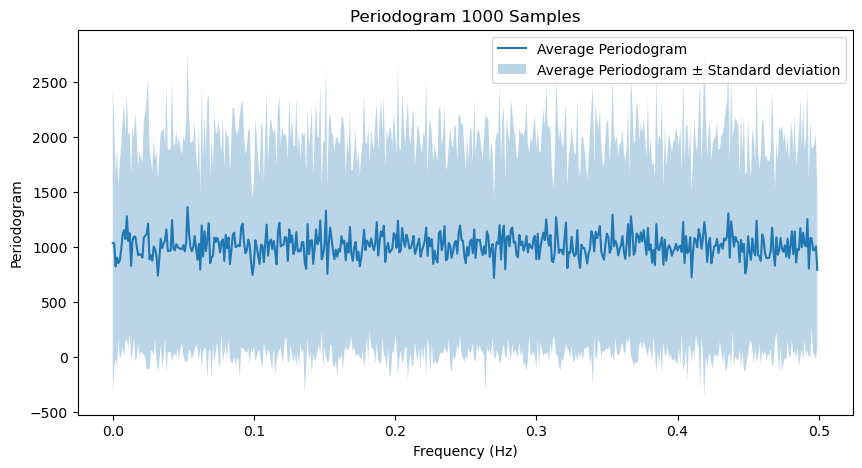

In [25]:
from scipy.fft import fft

periodograms = np.zeros((num_simulations, N))

for i in range(num_simulations):
    X = np.random.normal(0, np.sqrt(sigma_sq), N) 
    F = fft(X)
    periodograms[i] = np.abs(F)**2


# Calculate average periodogram and standard deviation
avg_periodogram = np.mean(periodograms, axis=0)
std_periodogram = np.std(periodograms, axis=0)

# Only take positive frequency
frequencies = np.fft.fftfreq(N, 1/fs)
positive_frequencies = frequencies[:N // 2]
avg_periodogram = avg_periodogram[:N // 2]
std_periodogram = std_periodogram[:N // 2]

# plot
plt.figure(figsize=(10, 5))
plt.plot(positive_frequencies, avg_periodogram, label='Average Periodogram')
plt.fill_between(positive_frequencies, avg_periodogram - std_periodogram, avg_periodogram + std_periodogram, alpha=0.3, label='Average Periodogram ± Standard deviation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Periodogram')
plt.legend()
plt.title('Periodogram '+ str(N) + " Samples")
plt.show()




#  Question 8

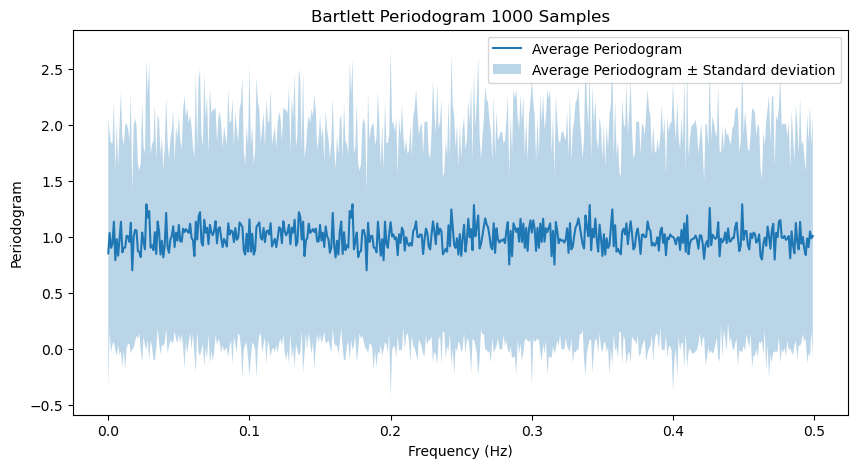

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
N = 1000  # Choose your desired value of N
num_simulations = 100
sigma_sq = 1.0
fs = 1.0  # Sampling frequency
K = 5  # Number of sections for Bartlett's estimate

# Initialize arrays to store results
average_bartlett_periodograms = []

# Create frequency axis
frequencies = np.fft.fftfreq(N, 1/fs)
positive_frequencies = frequencies[:N // 2]

# Perform the experiment for the specified value of N
bartlett_periodograms = np.zeros((num_simulations, N))

for i in range(num_simulations):
    X = np.random.normal(0, np.sqrt(sigma_sq), N)
    section_size = N // K
    section_periodograms = np.zeros((K, N))

    # Divide the signal into K sections and compute the periodogram for each section
    for k in range(K):
        start = k * section_size
        if (k!=K-1):
            end = (k + 1) * section_size
        else:
            end = N
        section = X[start:end]
        section_periodograms[k][start:end]  = np.abs(np.fft.fft(section))**2 / section_size

    # Sum the periodograms from all sections
    bartlett_periodograms[i] = np.sum(section_periodograms, axis=0)

# Average the periodograms from all simulations
average_periodogram = np.mean(bartlett_periodograms, axis=0)[:N // 2]
std_periodogram = np.std(bartlett_periodograms, axis=0)[:N // 2]
average_bartlett_periodograms.append(average_periodogram)

# Plot the results for the specified value of N
plt.figure(figsize=(10, 5))
plt.plot(positive_frequencies, average_periodogram, label='Average Periodogram')
plt.fill_between(positive_frequencies, average_periodogram - std_periodogram, average_periodogram + std_periodogram, alpha=0.3, label='Average Periodogram ± Standard deviation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Periodogram')
plt.legend()
plt.title('Bartlett Periodogram '+ str(N) + " Samples")
plt.show()
